<a href="https://colab.research.google.com/github/studybhanu/MLApp/blob/main/Merchant_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df1=pd.read_csv("/content/drive/MyDrive/train_merchant_data-1561627820784.csv")
train_df2=pd.read_csv("/content/drive/MyDrive/train_order_data-1561627847149.csv")
train_df3=pd.read_csv("/content/drive/MyDrive/train-1561627878332.csv")

In [ ]:
train_df1=train_df1.sort_values("Merchant_ID")
train_df2=train_df2.sort_values("Merchant_ID")
train_df3=train_df3.sort_values("Merchant_ID")

In [ ]:
train_df=pd.merge(pd.merge(train_df1,train_df2,on="Merchant_ID"),train_df3,on="Merchant_ID")

In [ ]:
train_df.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,1746213,2,2018-01-11 03:47:13,STODAQAORGSWW,F,25,52.119.13.140,141033,328aca82a1ed,2018-02-23 10:03:37,135,SEO,Credit Card,0
1,1746213,4,2018-06-02 16:40:57,ZXSHVIBUYWOLA,F,38,166.13.141.186,117580,a08573d3abed,2018-09-28 21:32:16,102,Direct,Debit Card,0
2,1746213,33,2018-08-10 08:30:49,IIDYBZOGBJIQQ,F,32,71.170.11.189,138528,76fad3f4d254,2018-10-30 18:12:41,128,Direct,Credit Card,0
3,1746213,41,2018-01-30 06:43:52,ZJQEGUIMFEAJE,F,28,98.86.110.205,136111,fa608bf56f15,2018-03-25 10:10:08,138,Ads,Internet Banking,0
4,1746213,44,2018-03-11 13:44:43,LLZDZZVFWCUKS,F,33,245.89.131.248,141646,8e767b8adde6,2018-06-28 05:45:06,82,Direct,Credit Card,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       54213 non-null  int64 
 1   Merchant_ID                 54213 non-null  int64 
 2   Merchant_Registration_Date  54213 non-null  object
 3   Registered_Device_ID        54213 non-null  object
 4   Gender                      54213 non-null  object
 5   Age                         54213 non-null  int64 
 6   IP_Address                  54213 non-null  object
 7   Customer_ID                 54213 non-null  int64 
 8   Order_ID                    54213 non-null  object
 9   Date_of_Order               54213 non-null  object
 10  Order_Value_USD             54213 non-null  int64 
 11  Order_Source                54213 non-null  object
 12  Order_Payment_Method        54213 non-null  object
 13  Fraudster                   54213 non-null  in

In [ ]:
test_df1=pd.read_csv("/content/test_merchant_data-1561627903902.csv")
test_df2=pd.read_csv("/content/test_order_data-1561627931868.csv")
test_df3=pd.read_csv("/content/test-1561627952093.csv")

In [ ]:
test_df1=test_df1.sort_values("Merchant_ID")
test_df2=test_df2.sort_values("Merchant_ID")
test_df3=test_df3.sort_values("Merchant_ID")

In [ ]:
test_df=pd.merge(pd.merge(test_df1,test_df2,on="Merchant_ID"),test_df3,on="Merchant_ID")

In [ ]:
test_df.info()

Feature construction

In [ ]:
df_ip=pd.read_csv("/content/ip_boundaries_countries-1561628631121.csv")

In [ ]:
df_ip.head()

In [ ]:

ip_values=train_df["IP_Address"]
ip_values_test=test_df["IP_Address"]

In [ ]:
l1=[]
l2=[]
l3=[]
l4=[]
for i in range(len(ip_values)):
  l1.append(int(ip_values[i].split(".")[0]))
  l2.append(int(ip_values[i].split(".")[1]))
  l3.append(int(ip_values[i].split(".")[2]))
  l4.append(int(ip_values[i].split(".")[3]))

In [ ]:
l1_t=[]
l2_t=[]
l3_t=[]
l4_t=[]
for i in range(len(ip_values_test)):
  l1_t.append(int(ip_values_test[i].split(".")[0]))
  l2_t.append(int(ip_values_test[i].split(".")[1]))
  l3_t.append(int(ip_values_test[i].split(".")[2]))
  l4_t.append(int(ip_values_test[i].split(".")[3]))

In [ ]:
data = []
data.append(l1)
data.append(l2)
data.append(l3)
data.append(l4)
df = pd.DataFrame(data).transpose()

In [ ]:
df.columns=['part_1', 'part_2',"part_3","part_4"]

In [ ]:
data_t = []
data_t.append(l1_t)
data_t.append(l2_t)
data_t.append(l3_t)
data_t.append(l4_t)
df_t = pd.DataFrame(data_t).transpose()

In [ ]:
df_t.columns=['part_1', 'part_2',"part_3","part_4"]

In [ ]:
df.head()

,part_1,part_2,part_3,part_4
0,52,119,13,140
1,166,13,141,186
2,71,170,11,189
3,98,86,110,205
4,245,89,131,248


In [ ]:
df_t.head()

,part_1,part_2,part_3,part_4
0,217,104,120,99
1,130,136,78,126
2,56,146,27,99
3,233,30,133,205
4,145,70,219,219


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df=scaler.fit_transform(df)
scaled_df_t=scaler.transform(df_t)

scaled_df =pd.DataFrame(scaled_df)
scaled_df_t=pd.DataFrame(scaled_df_t)


scaled_df.columns=df.columns
scaled_df_t.columns=df_t.columns

In [ ]:
scaled_df.head()

,part_1,part_2,part_3,part_4
0,-1.013897,-0.104491,-1.554980,0.163643
1,0.520361,-1.535048,0.183845,0.788378
2,-0.758187,0.583796,-1.582149,0.829122
3,-0.394810,-0.549853,-0.237277,1.046421
4,1.583574,-0.509365,0.047999,1.630413


In [ ]:
scaled_df_t.head()

,part_1,part_2,part_3,part_4
0,1.206739,-0.306928,-0.101431,-0.393186
1,0.035859,0.124938,-0.671983,-0.026494
2,-0.960063,0.259896,-1.364796,-0.393186
3,1.422074,-1.305619,0.075169,1.046421
4,0.237735,-0.765786,1.243442,1.236558


In [ ]:
cols = df.columns[0:4]

In [ ]:
from sklearn.cluster import KMeans
def cluster(X):
    k_means = KMeans(n_clusters=30,random_state=1234)
    fitted=k_means.fit(X)
    df_t["Cluster_id"]=k_means.predict(scaled_df_t)
    
    return X.groupby(fitted.labels_)\
            .transform('mean').sum(1)\
            .rank(method='dense').sub(1)\
            .astype(int).to_frame()

df['Cluster_id'] = df.groupby('part_1')[cols].apply(cluster)

In [ ]:
cluster(X=scaled_df)

,0
0,3
1,25
2,13
3,22
4,12
...,...
54208,7
54209,18
54210,5
54211,1


In [ ]:

df_t["Cluster_id"]

0         2
1         3
2        24
3        12
4        16
         ..
13549     4
13550    21
13551    18
13552    17
13553     2
Name: Cluster_id, Length: 13554, dtype: int32

In [ ]:
df_t

,part_1,part_2,part_3,part_4,Cluster_id
0,217,104,120,99,2
1,130,136,78,126,3
2,56,146,27,99,24
3,233,30,133,205,12
4,145,70,219,219,16
...,...,...,...,...,...
13549,47,53,97,28,4
13550,146,154,215,87,21
13551,237,205,51,84,18
13552,237,161,206,195,17


In [ ]:
train_df["ip_cluster_no"]=df["Cluster_id"]
test_df["ip_cluster_no"]=df_t["Cluster_id"]

In [ ]:
train_df

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_cluster_no
0,1746213,2,2018-01-11 03:47:13,STODAQAORGSWW,F,25,52.119.13.140,141033,328aca82a1ed,2018-02-23 10:03:37,135,SEO,Credit Card,0,1
1,1746213,4,2018-06-02 16:40:57,ZXSHVIBUYWOLA,F,38,166.13.141.186,117580,a08573d3abed,2018-09-28 21:32:16,102,Direct,Debit Card,0,14
2,1746213,33,2018-08-10 08:30:49,IIDYBZOGBJIQQ,F,32,71.170.11.189,138528,76fad3f4d254,2018-10-30 18:12:41,128,Direct,Credit Card,0,14
3,1746213,41,2018-01-30 06:43:52,ZJQEGUIMFEAJE,F,28,98.86.110.205,136111,fa608bf56f15,2018-03-25 10:10:08,138,Ads,Internet Banking,0,21
4,1746213,44,2018-03-11 13:44:43,LLZDZZVFWCUKS,F,33,245.89.131.248,141646,8e767b8adde6,2018-06-28 05:45:06,82,Direct,Credit Card,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,1746213,399965,2018-06-08 16:22:24,ZPKITRCOIEEJS,M,35,11.84.35.251,120278,14325d170e0f,2018-07-21 06:31:13,52,Ads,Internet Banking,0,14
54209,1746213,399971,2018-07-22 00:49:24,LRNPVSYLPDBTP,F,26,226.126.25.209,138941,0c58c83c90ca,2018-08-17 10:22:06,95,SEO,Debit Card,0,9
54210,1746213,399987,2018-01-20 09:56:11,UMAZHOTAPDHTI,M,28,170.66.123.50,131127,2fb8af4e158d,2018-04-28 09:55:20,75,Direct,Internet Banking,0,3
54211,1746213,399992,2018-06-04 17:43:28,PAISRQFPNJKTF,M,59,92.91.6.98,128893,49e932ffeff6,2018-10-02 07:19:17,205,Direct,Debit Card,0,2


In [ ]:
test_df.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,ip_cluster_no
0,1746213,18,2018-07-06 09:26:20,IUEWYXITTOKBV,M,39,217.104.120.99,140282,773b895dac70,2018-10-25 00:18:57,28,SEO,Internet Banking,2
1,1746213,57,2018-08-08 20:37:26,EGWSSYLMYDQHX,F,39,130.136.78.126,115736,017cf0888e7c,2018-09-07 00:42:42,95,Ads,E-wallet,3
2,1746213,99,2018-02-09 05:15:35,HJLQBTDQTMNRC,M,33,56.146.27.99,155580,3014817cda0e,2018-05-28 21:10:27,138,Ads,Debit Card,24
3,1746213,152,2018-04-06 01:13:17,YTJXLNYENAAXG,F,37,233.30.133.205,164502,0000fb139236,2018-07-28 07:48:17,35,SEO,E-wallet,12
4,1746213,176,2018-08-17 18:20:38,IUWOSVKNMFAMS,M,22,145.70.219.219,112477,c97e8465268e,2018-12-15 17:14:10,115,Ads,Internet Banking,16


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54213 entries, 0 to 54212
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       54213 non-null  int64 
 1   Merchant_ID                 54213 non-null  int64 
 2   Merchant_Registration_Date  54213 non-null  object
 3   Registered_Device_ID        54213 non-null  object
 4   Gender                      54213 non-null  object
 5   Age                         54213 non-null  int64 
 6   IP_Address                  54213 non-null  object
 7   Customer_ID                 54213 non-null  int64 
 8   Order_ID                    54213 non-null  object
 9   Date_of_Order               54213 non-null  object
 10  Order_Value_USD             54213 non-null  int64 
 11  Order_Source                54213 non-null  object
 12  Order_Payment_Method        54213 non-null  object
 13  Fraudster                   54213 non-null  in

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 13553
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Ecommerce_Provider_ID       13554 non-null  int64 
 1   Merchant_ID                 13554 non-null  int64 
 2   Merchant_Registration_Date  13554 non-null  object
 3   Registered_Device_ID        13554 non-null  object
 4   Gender                      13554 non-null  object
 5   Age                         13554 non-null  int64 
 6   IP_Address                  13554 non-null  object
 7   Customer_ID                 13554 non-null  int64 
 8   Order_ID                    13554 non-null  object
 9   Date_of_Order               13554 non-null  object
 10  Order_Value_USD             13554 non-null  int64 
 11  Order_Source                13554 non-null  object
 12  Order_Payment_Method        13554 non-null  object
 13  ip_cluster_no               13554 non-null  in

In [ ]:
train_df1=train_df.copy()


In [ ]:
#train_df=train_df1.copy()

unneccessary column are:

      Ecommerce_Provider_ID       
      Merchant_ID                 
      Merchant_Registration_Date  
      Registered_Device_ID 
      IP_Address
      Customer_ID
      Order_ID
      Date_of_Order

In [ ]:

cat_cols_train = ["Ecommerce_Provider_ID","Merchant_ID","IP_Address","Registered_Device_ID","Gender","Customer_ID","Order_ID","Order_Source","Order_Payment_Method","Fraudster","ip_cluster_no"]
cat_cols_test = ["Ecommerce_Provider_ID","Merchant_ID","IP_Address","Registered_Device_ID","Gender","Customer_ID","Order_ID","Order_Source","Order_Payment_Method","ip_cluster_no"]
num_cols = ["Age","Order_Value_USD"]
time_cols=["Merchant_Registration_Date","Date_of_Order"]

def convert_columns_types(DataFrame, cols=None, col_type = None):
    
    """conversion of Data types as per Business context"""

    print('Before conversion:\n', DataFrame.dtypes,'\n')
    DataFrame[cols] = DataFrame[cols].astype(col_type)
    print('After conversion:\n', DataFrame.dtypes,'\n')
    return DataFrame










def drop_unnecessary_columns(DataFrame, cols=None):

    """ Dropping Unnecessary columns in the data set like
        high cardinality of categorical variables"""
        
    
    DataFrame.drop(columns=cols,axis=1, inplace=True)
    
    return DataFrame



def get_duplicate_records(df):
    
    """displaying all records of same values in all the columns
     which is nothing but all duplicated records. 
     but we should retain atleast one record from all those duplicated records""" 
     
    dup = df[df.duplicated(keep="first")]# considering all records as duplicated records
    print('Duplicated index loc:',dup[dup == True ].index.tolist())
    return dup




def get_Duplicate_Columns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x and y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)





def display_pie_chart(DataFrame, cols=None):
    print(DataFrame[cols].value_counts())
    print('Number of unique values in {} is '.format(cols), DataFrame[cols].nunique(),'\n')
    print('percentage share of each category in {} is '.format(cols), "as follows :"'\n')
    DataFrame[cols].value_counts().plot(kind='pie',autopct="%.2f")



def distribution_of_column(DataFrame,col=None):

    """ 
    To see the distribution of column by looking at skewness of data
 
    """

    sns.distplot(x=DataFrame[col], hist= True,kde= True,color = 'darkblue', hist_kws={"color":"blue"},
             kde_kws={'linewidth': 4})
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(' Distribution of {}'.format(col))
    plt.axvline(DataFrame[col].mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(DataFrame[col].mean(), max_ylim*0.95, 'Mean: {:.2f}'.format(DataFrame[col].mean()))





import plotly.graph_objects as go
def boxplot_of_column(DataFrame,col=None): 
    fig = go.Figure()
    fig.add_trace(go.Box(
        y=DataFrame[col],
        name='Box Plot of '+ col,
        marker_color='darkblue',
        boxmean='sd'# represent mean and standard deviation 
    ))

    fig.show()





#using iqr method to detect outliers
def outlier_fun(data,col=None):
    outliers = []
    data[col] = sorted(data[col])
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
        
    print("upper bound is: ", upr_bound)
    print("lower_bound is: ", lwr_bound)
    for i in data[col]:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    print("Outliers are: ",outliers )
    return lwr_bound,upr_bound






def treatment_outlier(df,col):
    """
    Imputation of outlier values with medain
    """
   
    df[col] = np.where((df[col] < lwr_bound) | (df[col] > upr_bound), df[col].median(), df[col])
    print(df[col])
    print("Distribution after treatment of outliers: ")






In [ ]:
train_df_cat = convert_columns_types(train_df, cols = cat_cols_train , col_type = 'category')
train_df_num = convert_columns_types(train_df, cols = num_cols , col_type = 'float64')
train_df_time = convert_columns_types(train_df, cols = time_cols , col_type = 'datetime64[ns]')



train_df= drop_unnecessary_columns(train_df, cols="Registered_Device_ID")
train_df= drop_unnecessary_columns(train_df, cols="Ecommerce_Provider_ID")
train_df= drop_unnecessary_columns(train_df, cols="Order_ID")
train_df= drop_unnecessary_columns(train_df, cols="Customer_ID")
train_df= drop_unnecessary_columns(train_df, cols="Merchant_ID")
train_df= drop_unnecessary_columns(train_df, cols="Merchant_Registration_Date")
train_df= drop_unnecessary_columns(train_df, cols="IP_Address")
train_df= drop_unnecessary_columns(train_df, cols="Date_of_Order")

Before conversion:
 Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
ip_cluster_no                  int64
dtype: object 

After conversion:
 Ecommerce_Provider_ID         category
Merchant_ID                   category
Merchant_Registration_Date      object
Registered_Device_ID          category
Gender                        category
Age                              int64
IP_Address                    category
Customer_ID                   category
Order_ID                      category
Date_of_Order                   object


In [ ]:
train_info_about_null_value=pd.DataFrame()
if train_df.isnull().sum().sum()>0:
    
    train_info_about_null_value["columns"]=list(train_df.columns)
    train_info_about_null_value["null_value_count"]=list(train_df.isnull().sum())
    train_info_about_null_value["Total_no_of_values"]=train_df.shape[0]
    train_info_about_null_value["%_of_null_values"]=list(train_df.isnull().mean()*100)
    train_info_about_null_value
else:
    print("no null values")

no null values


In [ ]:
train_df.describe(include="all")

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_cluster_no
count,54213,54213.000000,54213.000000,54213,54213,54213.0,54213.0
unique,2,NaN,NaN,3,5,2.0,30.0
top,M,NaN,NaN,SEO,Credit Card,0.0,14.0
freq,31761,NaN,NaN,21884,21844,49188.0,1895.0
mean,NaN,33.122240,92.230240,NaN,NaN,NaN,NaN
std,NaN,8.630091,45.673263,NaN,NaN,NaN,NaN
min,NaN,18.000000,22.000000,NaN,NaN,NaN,NaN
25%,NaN,27.000000,55.000000,NaN,NaN,NaN,NaN
50%,NaN,32.000000,88.000000,NaN,NaN,NaN,NaN
75%,NaN,39.000000,122.000000,NaN,NaN,NaN,NaN


0    49188
1     5025
Name: Fraudster, dtype: int64
Number of unique values in Fraudster is  2 

percentage share of each category in Fraudster is  as follows :



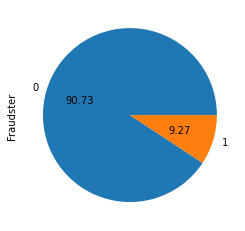

In [ ]:

# checking class imbalance
display_pie_chart(train_df,cols="Fraudster")

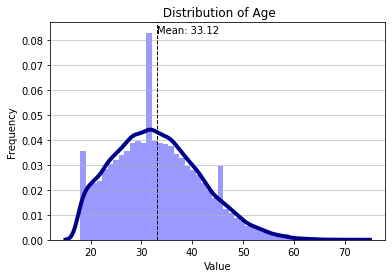

In [ ]:

distribution_of_column(train_df,col="Age")


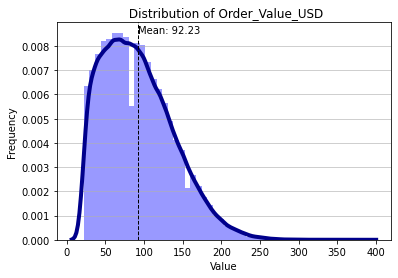

In [ ]:


distribution_of_column(train_df,col="Order_Value_USD")

In [ ]:
# for confirmation of outliers

boxplot_of_column(train_df,col="Order_Value_USD")

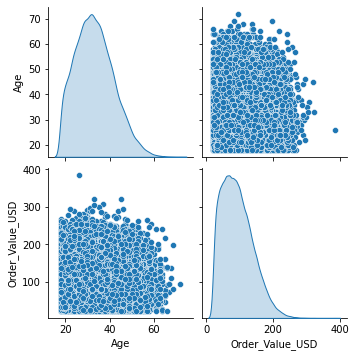

In [ ]:

# pair plot
sns.pairplot(train_df, diag_kind='kde')

upper bound is:  222.5
lower_bound is:  -45.5
Outliers are:  [225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 225.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 228.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 230.0, 232.0, 232.0, 232.0, 232.0, 232.0, 232.0, 232.0, 232.0, 232.0, 232.0, 232.0, 232.0, 

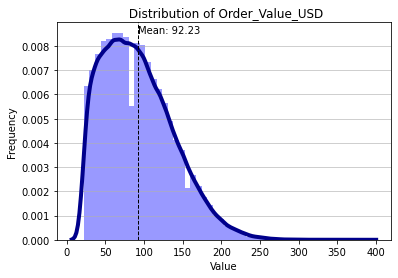

In [ ]:
lwr_bound,upr_bound=outlier_fun(train_df,col="Order_Value_USD")
print("Distribution before treatment of outliers: ")
distribution_of_column(train_df,col="Order_Value_USD")

0        22.0
1        22.0
2        22.0
3        22.0
4        22.0
         ... 
54208    88.0
54209    88.0
54210    88.0
54211    88.0
54212    88.0
Name: Order_Value_USD, Length: 54213, dtype: float64
Distribution after treatment of outliers: 


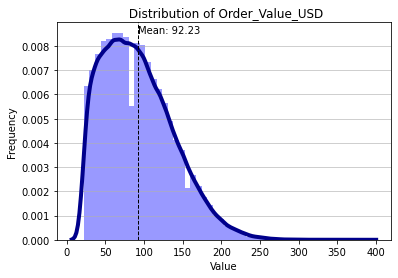

In [ ]:

distribution_of_column(train_df,col="Order_Value_USD")
treatment_outlier(train_df,col="Order_Value_USD")


In [ ]:
test_df1=test_df.copy()

In [ ]:
#test_df=test_df1.copy()

In [ ]:
test_df_cat = convert_columns_types(test_df, cols = cat_cols_test , col_type = 'category')
test_df_num = convert_columns_types(test_df, cols = num_cols , col_type = 'float64')
test_df_time = convert_columns_types(test_df, cols = time_cols , col_type = 'datetime64[ns]')



test_df= drop_unnecessary_columns(test_df, cols="Registered_Device_ID")
test_df= drop_unnecessary_columns(test_df, cols="Ecommerce_Provider_ID")
test_df= drop_unnecessary_columns(test_df, cols="Order_ID")
test_df= drop_unnecessary_columns(test_df, cols="Customer_ID")
test_df= drop_unnecessary_columns(test_df, cols="Merchant_ID")
test_df= drop_unnecessary_columns(test_df, cols="Merchant_Registration_Date")
test_df= drop_unnecessary_columns(test_df, cols="IP_Address")
test_df= drop_unnecessary_columns(test_df, cols="Date_of_Order")


Before conversion:
 Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
ip_cluster_no                  int32
dtype: object 

After conversion:
 Ecommerce_Provider_ID         category
Merchant_ID                   category
Merchant_Registration_Date      object
Registered_Device_ID          category
Gender                        category
Age                              int64
IP_Address                    category
Customer_ID                   category
Order_ID                      category
Date_of_Order                   object
Order_Value_USD                  int6

In [ ]:
test_info_about_null_value=pd.DataFrame()
if test_df.isnull().sum().sum()>0:
    
    test_info_about_null_value["columns"]=list(test_df.columns)
    test_info_about_null_value["null_value_count"]=list(test_df.isnull().sum())
    test_info_about_null_value["Total_no_of_values"]=test_df.shape[0]
    test_info_about_null_value["%_of_null_values"]=list(test_df.isnull().mean()*100)
    test_info_about_null_value
else:
    print("no null values")




no null values


In [ ]:
train_df2=train_df.copy()

In [ ]:
test_df2=test_df.copy()

In [ ]:
train_df.head()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_cluster_no
0,F,25.0,22.0,SEO,Credit Card,0,1
1,F,38.0,22.0,Direct,Debit Card,0,14
2,F,32.0,22.0,Direct,Credit Card,0,14
3,F,28.0,22.0,Ads,Internet Banking,0,21
4,F,33.0,22.0,Direct,Credit Card,1,14


In [ ]:
train_df["Gender"] = np.where(train_df["Gender"] == "F", 0, 1)


In [ ]:
train_df["Gender"] = np.where(train_df["Gender"] == "F", 0, 1)

train_df["Order_Source"] = np.where(train_df["Order_Source"] == "SEO", 0, 
                                np.where(train_df["Order_Source"] == "Ads", 1,2))

train_df["Order_Payment_Method"] = np.where(train_df["Order_Payment_Method"] == "Credit Card", 0, 
                                    np.where(train_df["Order_Payment_Method"] == "Internet Banking", 1,
                                             np.where(train_df["Order_Payment_Method"] == "Internet Banking", 2,
                                                     np.where(train_df["Order_Payment_Method"] == "Internet Banking", 3,4))))

In [ ]:
train_df.head()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_cluster_no
0,1,25.0,22.0,0,0,0,1
1,1,38.0,22.0,2,4,0,14
2,1,32.0,22.0,2,0,0,14
3,1,28.0,22.0,1,1,0,21
4,1,33.0,22.0,2,0,1,14


In [ ]:
test_df["Gender"] = np.where(test_df["Gender"] == "F", 0, 1)

test_df["Order_Source"] = np.where(test_df["Order_Source"] == "SEO", 0, 
                                np.where(test_df["Order_Source"] == "Ads", 1,2))

test_df["Order_Payment_Method"] = np.where(test_df["Order_Payment_Method"] == "Credit Card", 0, 
                                    np.where(test_df["Order_Payment_Method"] == "Internet Banking", 1,
                                             np.where(test_df["Order_Payment_Method"] == "Internet Banking", 2,
                                                     np.where(test_df["Order_Payment_Method"] == "Internet Banking", 3,4))))

In [ ]:
test_df.head()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,ip_cluster_no
0,1,39.0,28.0,0,1,2
1,0,39.0,95.0,1,4,3
2,1,33.0,138.0,1,4,24
3,0,37.0,35.0,0,4,12
4,1,22.0,115.0,1,1,16


In [ ]:
X=train_df.loc[:,train_df.columns!="Fraudster"]
y=train_df["Fraudster"]

In [ ]:
y.values

[0, 0, 0, 0, 1, ..., 0, 0, 0, 0, 0]
Length: 54213
Categories (2, int64): [0, 1]

In [ ]:

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [ ]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [ ]:
X.head()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,ip_cluster_no
0,1,25.0,22.0,0,0,1
1,1,38.0,22.0,2,4,14
2,1,32.0,22.0,2,0,14
3,1,28.0,22.0,1,1,21
4,1,33.0,22.0,2,0,14


In [ ]:
y.head()

,Fraudster
0,0
1,0
2,0
3,0
4,1


In [ ]:
for i in ["Gender","Order_Source","Order_Payment_Method","ip_cluster_no"]:
  X[i]=X[i].astype("category")
  test_df[i]=test_df[i].astype("category")

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y, random_state=1234)

def get_num_cat_dataframes(DataFrame):

    """ getting numerical columns and categorical columns
        in seperate data frames
    """

    num_df = DataFrame.select_dtypes(include=['int','float'])
    cat_df = DataFrame.select_dtypes(include=['category'])
    return num_df, cat_df


X_train_num , X_train_cat = get_num_cat_dataframes(X_train)
X_test_num , X_test_cat = get_num_cat_dataframes(X_test)

test_num,test_cat=get_num_cat_dataframes(test_df)

In [ ]:
print(X_train_num.shape)
print(X_test_num.shape)
print(test_num.shape)

(68863, 2)
(29513, 2)
(13554, 2)


In [ ]:
print(X_train_cat.shape)
print(X_test_cat.shape)
print(test_cat.shape)

(68863, 4)
(29513, 4)
(13554, 4)


In [ ]:
# one hot encoding


nominal_columns_train=X_train[["Gender","Order_Source","Order_Payment_Method","ip_cluster_no"]]
nominal_columns_test=X_test[["Gender","Order_Source","Order_Payment_Method","ip_cluster_no"]]
test_nominal_columns=test_df[["Gender","Order_Source","Order_Payment_Method","ip_cluster_no"]]

In [ ]:
# one hot encoding

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(drop="first",sparse=False, handle_unknown="ignore")
# basically drop first column to reduce multicollinearity
# dont create sparse matrix (so that it can be in data frame )
# if there values that dont fit and if the values are in test data just ignore it dont throw an erreor


nominal_columns_train_ohe=ohe.fit_transform(nominal_columns_train)
nominal_columns_test_ohe=ohe.transform(nominal_columns_test)



real_test_nominal_columns_ohe=ohe.transform(test_nominal_columns)




nominal_columns_train_ohe=pd.DataFrame(nominal_columns_train_ohe)
nominal_columns_test_ohe=pd.DataFrame(nominal_columns_test_ohe)

real_test_nominal_columns_ohe=pd.DataFrame(real_test_nominal_columns_ohe)


#giving column names after doing one hot encoding 

nominal_columns_train_ohe.columns= ohe.get_feature_names_out(nominal_columns_train.columns)
nominal_columns_test_ohe.columns=  ohe.get_feature_names_out(nominal_columns_test.columns)
real_test_nominal_columns_ohe.columns=     ohe.get_feature_names_out(test_nominal_columns.columns)

In [ ]:
train_df.head()

,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_cluster_no
0,1,25.0,22.0,0,0,0,1
1,1,38.0,22.0,2,4,0,14
2,1,32.0,22.0,2,0,0,14
3,1,28.0,22.0,1,1,0,21
4,1,33.0,22.0,2,0,1,14


In [ ]:
X_train_num=X_train[["Age","Order_Value_USD"]]
X_test_num=X_test[["Age","Order_Value_USD"]]
test_num=test_df[["Age","Order_Value_USD"]]

In [ ]:

# feature scaling using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
test_num_scaled=scaler.transform(test_num)




X_train_num_scaled=pd.DataFrame(X_train_num_scaled)
X_test_num_scaled=pd.DataFrame(X_test_num_scaled)
test_num_scaled=pd.DataFrame(test_num_scaled)




X_train_num_scaled.columns = scaler.get_feature_names_out(X_train_num.columns)
X_test_num_scaled.columns = scaler.get_feature_names_out(X_test_num.columns)
test_num_scaled.columns = scaler.get_feature_names_out(test_num.columns)

In [ ]:
nominal_columns_train_ohe.reset_index(inplace=True)

nominal_columns_train_ohe.drop(["index"],axis=1,inplace=True)

In [ ]:
X_train_num_scaled.reset_index(inplace=True)
X_train_num_scaled.drop(["index"],axis=1,inplace=True)

In [ ]:
X_train_total=pd.concat([X_train_num_scaled,nominal_columns_train_ohe],axis=1)

In [ ]:
X_train_total.head()

,Age,Order_Value_USD,Order_Source_1,Order_Source_2,Order_Payment_Method_1,Order_Payment_Method_2,Order_Payment_Method_3,Order_Payment_Method_4,ip_cluster_no_1.0,ip_cluster_no_2.0,...,ip_cluster_no_21.0,ip_cluster_no_22.0,ip_cluster_no_23.0,ip_cluster_no_24.0,ip_cluster_no_25.0,ip_cluster_no_26.0,ip_cluster_no_27.0,ip_cluster_no_28.0,ip_cluster_no_29.0,ip_cluster_no_nan
0,0.092307,-0.252137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.617507,-1.568071,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.969476,1.063796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.376985,-0.592465,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.265538,0.428518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_total.isnull().sum().sum()

0

In [ ]:
nominal_columns_test_ohe.isnull().sum().sum()

0

In [ ]:
nominal_columns_test_ohe.shape

(29513, 36)

In [ ]:
X_test_num_scaled.isnull().sum().sum()

0

In [ ]:
X_test_num_scaled.shape

(29513, 2)

In [ ]:
nominal_columns_test_ohe.reset_index(inplace=True)
nominal_columns_test_ohe.drop(["index"],axis=1,inplace=True)


In [ ]:
X_test_total=pd.concat([X_test_num_scaled,nominal_columns_test_ohe],axis=1)

In [ ]:
X_test_total.isnull().sum().sum()

0

In [ ]:
real_test_nominal_columns_ohe.reset_index(inplace=True)
real_test_nominal_columns_ohe.drop(["index"],inplace=True,axis=1)

In [ ]:
test_total=pd.concat([real_test_nominal_columns_ohe,test_num_scaled],axis=1)

In [ ]:
test_total.isnull().sum().sum()

0

In [ ]:
X_train_total.head()

,Age,Order_Value_USD,Order_Source_1,Order_Source_2,Order_Payment_Method_1,Order_Payment_Method_2,Order_Payment_Method_3,Order_Payment_Method_4,ip_cluster_no_1.0,ip_cluster_no_2.0,...,ip_cluster_no_21.0,ip_cluster_no_22.0,ip_cluster_no_23.0,ip_cluster_no_24.0,ip_cluster_no_25.0,ip_cluster_no_26.0,ip_cluster_no_27.0,ip_cluster_no_28.0,ip_cluster_no_29.0,ip_cluster_no_nan
0,0.092307,-0.252137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.617507,-1.568071,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.969476,1.063796,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.376985,-0.592465,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.265538,0.428518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

x_train = pca.fit_transform(X_train_total)

x_test = pca.transform(X_test_total)

test=pca.transform(test_total)

explained_variane = pca.explained_variance_ratio_

In [ ]:
explained_variane

array([0.28104943, 0.27257846, 0.07562361, 0.06849148, 0.06597877,
       0.03067816])

In [ ]:
# importing neccessary modules for Model Building
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
# creating instances for different classes
dt = DecisionTreeClassifier()
svc= SVC()
knn = KNeighborsClassifier()

In [ ]:
# various list of dictionaries of hyper parameters  depending upon the classifier we using
param_grid_dt = {
    
              'n_estimators' : [1000],
              'max_samples' : [ 0.5, 0.6, 0.7],
              "base_estimator__max_depth" :[500,1000,2000]
                
                }

param_grid_svc={
              
              'n_estimators' : [2000],
              'base_estimator__C': [0.1, 1,10,100],  
              'base_estimator__kernel': ['rbf'], 
              'max_samples' : [ 0.5, 0.6] 
}
               


param_grid_knn = {

              'n_estimators' : [500],
              "base_estimator__n_neighbors":list(range(250,500)), 
              
             
               }

In [ ]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:

import time

def training_model(estimators,param_grids,cross_valid=5):

  """ 
  Training the model using bagging classifier and hyper tuning the hyper parameters using Grid search cv

  """
  
  clf = GridSearchCV(BaggingClassifier(base_estimator=estimators, random_state=1234,bootstrap=True),cv=cross_valid,verbose=2,param_grid=param_grids,scoring = "f1",n_jobs=-1)
  start_time =now = time.time() #starting time of training 
  clf.fit(x_train,y_train) # fiiting classifier along with bagging
  end_time =now = time.time() #ending time of training
  execution_time=end_time - start_time # execution time of training

  print("execution Time = ", round(execution_time/60,2)," minutes")
  print("Optimal parameters %s accuracy score of  %0.2f" % (clf.best_params_, clf.best_score_))

  return clf











In [ ]:
clf=training_model(estimators=dt,param_grids=param_grid_dt,cross_valid=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: ignored

In [ ]:
def display_train_scores(actuals,predictions):
    train_accuracy=accuracy_score(actuals,predictions )
    train_precision=precision_score(actuals,predictions)
    train_recall=recall_score(actuals,predictions)
    train_f1=f1_score(actuals,predictions)

    print("Train Accuracy = ",round(train_accuracy*100,4))
    print("Train Precision = ",round(train_precision*100,4))
    print("Train Recall = " , round(train_recall*100,4))
    print("Train F1 = " , round(train_f1*100,4))

In [ ]:

def display_test_scores(actuals,predictions):
    test_accuracy=accuracy_score(actuals,predictions )
    test_precision=precision_score(actuals,predictions)
    test_recall=recall_score(actuals,predictions)
    test_f1=f1_score(actuals,predictions)

    
    print("Test Accuracy = ",round(test_accuracy*100,4))
    print("Test Precision = ",round(test_precision*100,4))
    print("Test Recall = " , round(test_recall*100,4))
    print("Test F1 = " , round(test_f1*100,4))


In [ ]:
dt1=DecisionTreeClassifier(max_depth=1000)
clf1=dt1.fit(x_train,y_train)
train_pred=clf1.predict(x_train)
test_pred=clf1.predict(x_test)


In [ ]:
display_train_scores(actuals=y_train,predictions=train_pred)

Train Accuracy =  99.5876
Train Precision =  99.9444
Train Recall =  99.2303
Train F1 =  99.5861


In [ ]:
display_test_scores(actuals=y_test,predictions=test_pred)

Test Accuracy =  86.7448
Test Precision =  86.1621
Test Recall =  87.5517
Test F1 =  86.8513


In [ ]:
df_real_test=pd.read_csv("/content/test-1561627952093.csv")
df_real_test=df_real_test.sort_values(by='Merchant_ID')

In [ ]:
real_predictions=clf1.predict(test)
real_predictions=pd.DataFrame(real_predictions)


In [ ]:
pd.concat([df_real_test,real_predictions],axis=1).to_csv("testing.csv")